## Analise da serie temporal 01 - Cotacao do Dolar em relacao ao Real

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_original = pd.read_csv('../data/us-dollar-vs-brazilian-real-rate.csv', header=0, names=['date', 'rate'])

arima.print_dataframe_info(df_original)

SHAPE: (6182, 2)

DTYPES: date    object
rate    object
dtype: object

##########################################################################################
HEAD 

         date    rate
0  1995-01-02  0.8440
1  1995-01-03  0.8450
2  1995-01-04  0.8450
3  1995-01-05  0.8430
4  1995-01-06  0.8400


##########################################################################################
TAIL 

            date    rate
6177  2018-09-17  4.1718
6178  2018-09-18  4.1277
6179  2018-09-19   4.116
6180  2018-09-20  4.0834
6181  2018-09-21  4.0536


In [3]:
df = df_original.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

arima.print_dataframe_info(df)

SHAPE: (6182, 1)

DTYPES: rate    object
dtype: object

##########################################################################################
HEAD 

              rate
date              
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


##########################################################################################
TAIL 

              rate
date              
2018-09-17  4.1718
2018-09-18  4.1277
2018-09-19   4.116
2018-09-20  4.0834
2018-09-21  4.0536


In [4]:
idx = pd.date_range('01-02-1995', '09-21-2018')
df = df.reindex(idx, fill_value=0)

arima.print_dataframe_info(df)

SHAPE: (8664, 1)

DTYPES: rate    object
dtype: object

##########################################################################################
HEAD 

              rate
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


##########################################################################################
TAIL 

              rate
2018-09-17  4.1718
2018-09-18  4.1277
2018-09-19   4.116
2018-09-20  4.0834
2018-09-21  4.0536


In [5]:
df = df.replace(0, np.nan)
df = df.replace('.', np.nan)

print(df.isnull().values.any())

True


In [6]:
df = df.fillna(method='ffill')

print(df.isnull().values.any())

False


In [7]:
df.rate = pd.to_numeric(df.rate)

arima.print_dataframe_info(df)

SHAPE: (8664, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

             rate
1995-01-02  0.844
1995-01-03  0.845
1995-01-04  0.845
1995-01-05  0.843
1995-01-06  0.840


##########################################################################################
TAIL 

              rate
2018-09-17  4.1718
2018-09-18  4.1277
2018-09-19  4.1160
2018-09-20  4.0834
2018-09-21  4.0536


Text(0.5,0,'Time')

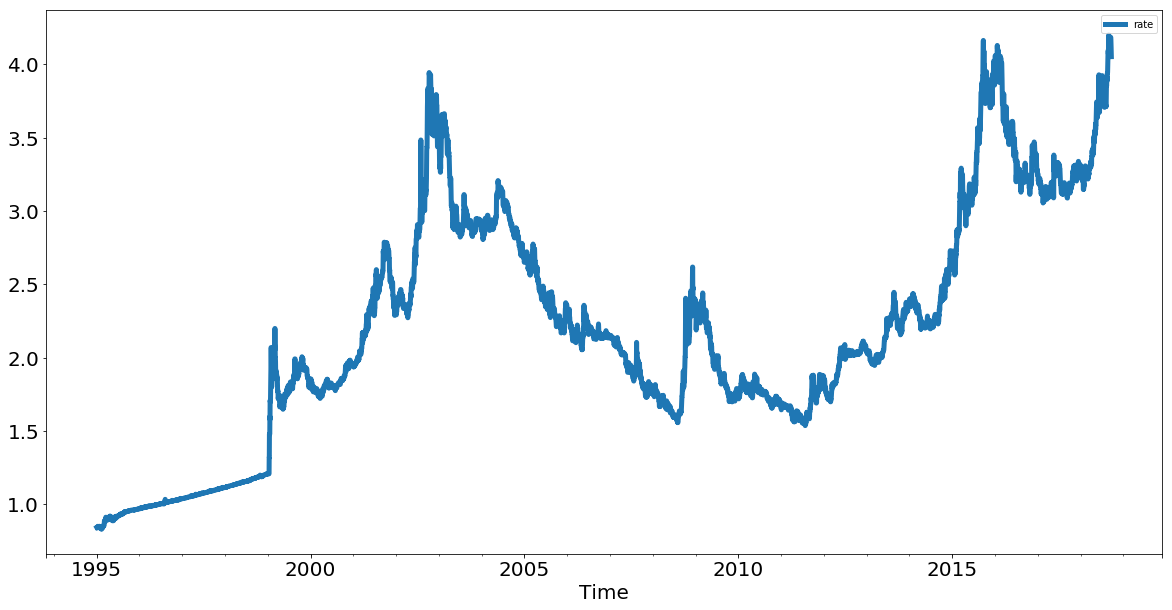

In [8]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

In [9]:
df = df['1999-09-21':]

arima.print_dataframe_info(df)

SHAPE: (6941, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

              rate
1999-09-21  1.8800
1999-09-22  1.8960
1999-09-23  1.8910
1999-09-24  1.9175
1999-09-25  1.9175


##########################################################################################
TAIL 

              rate
2018-09-17  4.1718
2018-09-18  4.1277
2018-09-19  4.1160
2018-09-20  4.0834
2018-09-21  4.0536


Text(0.5,0,'Time')

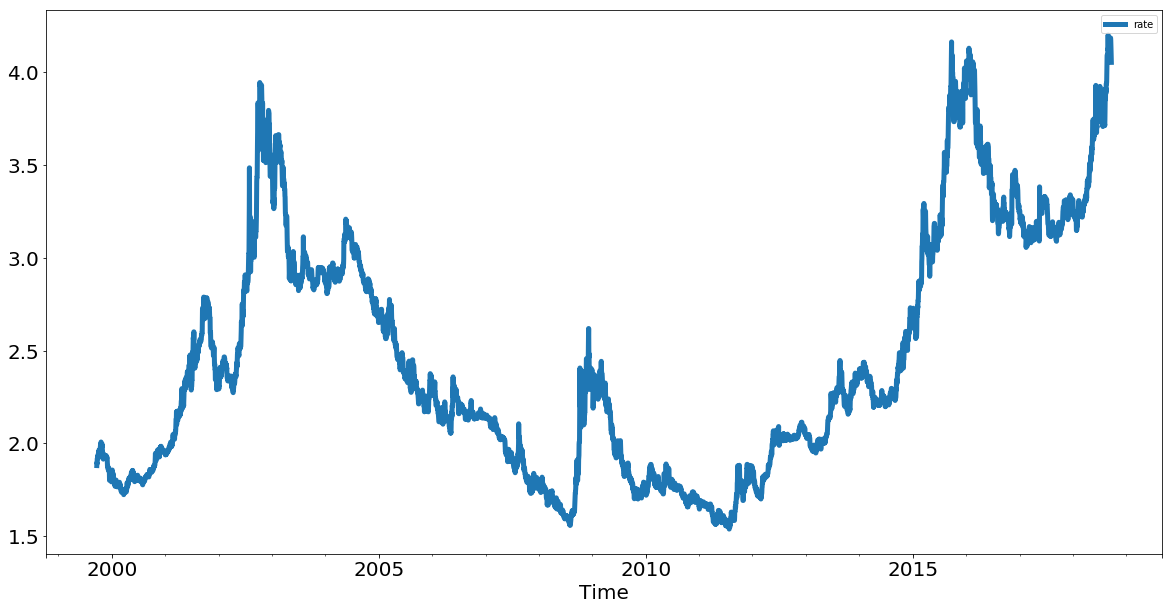

In [10]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

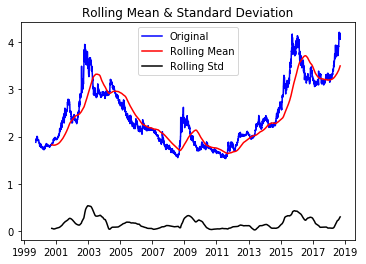

Results of Dickey-Fuller Test:
Test Statistic (-0.668042) > Critical Value 1 (-3.431297)
Test Statistic (-0.668042) > Critical Value 5 (-2.861958)
Test Statistic (-0.668042) > Critical Value 10 (-2.566993)
p-value (0.854855) > 0.05


In [11]:
timeseries.check_stationarity(df, window=365)

In [12]:
df_monthly = df.resample('M')
df_monthly = df_monthly.mean()

arima.print_dataframe_info(df_monthly)

SHAPE: (229, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

                rate
1999-09-30  1.912250
1999-10-31  1.964968
1999-11-30  1.930700
1999-12-31  1.844161
2000-01-31  1.804829


##########################################################################################
TAIL 

                rate
2018-05-31  3.631516
2018-06-30  3.769590
2018-07-31  3.823542
2018-08-31  3.924729
2018-09-30  4.128986


Text(0.5,0,'Time')

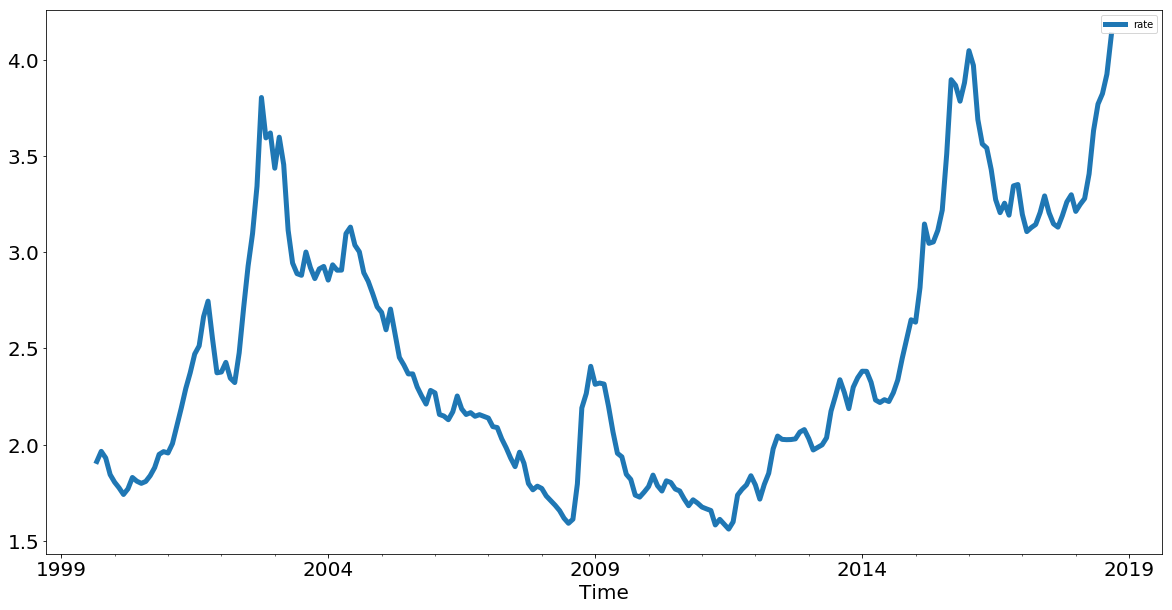

In [13]:
df_monthly.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

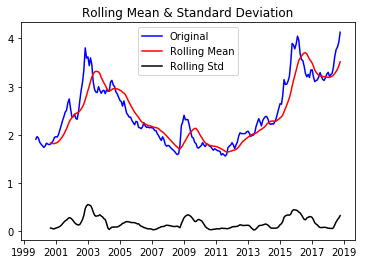

Results of Dickey-Fuller Test:
Test Statistic (-0.796474) > Critical Value 1 (-3.459490)
Test Statistic (-0.796474) > Critical Value 5 (-2.874358)
Test Statistic (-0.796474) > Critical Value 10 (-2.573602)
p-value (0.820156) > 0.05


In [14]:
timeseries.check_stationarity(df_monthly, window=12)

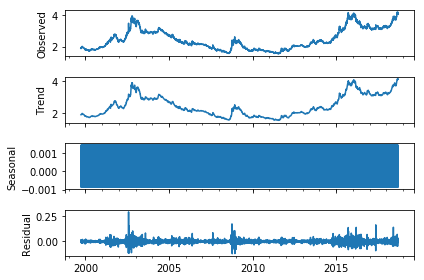

In [15]:
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

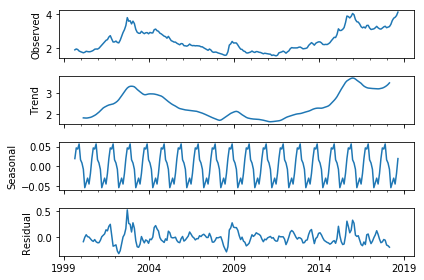

In [16]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()